# Question Answering using Large Language Models on a Minority Language (Basque)


Aimar Silvan (@asortubay), Fall 2024

## Introduction

Traditional machine learning problems like classification and regression are often emphasized in machine learning courses due to their foundational nature and accessibility for teaching core concepts. However, natural language processing (NLP) is sometimes overlooked in these settings because of its perceived complexity and the additional time required to cover its basics and little nuances. Despite this, NLP has emerged as one of the most transformative fields in artificial intelligence in recent years. Its applications have revolutionized how people work, reshaped educational practices, and significantly influenced how AI and machine learning are perceived by the broader public.


NLP, as the name suggests, encompasses a wide range of tasks, each addressing specific challenges in processing and understanding human language. Among these tasks, we can find specific applications:
* _Text classification_ involves assigning predefined labels to text, such as spam detection in emails. 
* _Named Entity Recognition (NER)_ focuses on identifying entities like names, dates, or locations within text. 
* _Machine Translation_ converts text from one language to another, as seen in tools like Google Translate. 
* _Text Summarization_ condenses large volumes of text into concise summaries while preserving key information. 
* _Sentiment Analysis_ determines the emotional tone of text, often used for analyzing customer feedback. 
* _Question Answering (QA)_ aims to extract or generate accurate answers to user queries, showcasing advanced language understanding and reasoning capabilities. 

Perhaps the best known application of NLP are _generative models_, like ChatGPT, Gemini, and Llama, among others, which are capable of producing coherent and contextually relevant text across diverse applications. These models are typically trained on vast datasets, encompassing a wide range of topics, to predict the next word in a sequence using techniques like transformer architectures. Training such models requires immense computational resources, including powerful GPUs or TPUs, distributed across massive clusters, and extended training times. The size of these models, often reaching billions of parameters, allows them to capture very complex linguistic patterns, but this also contributes to their significant energy and cost requirements.

### How NLP models understand text


NLP models process and understand text by breaking it into smaller units called **tokens**, which can be words, subwords, or even characters. This process, known as **tokenization**, converts text into numerical representations that machines can understand. For example, the sentence *"The cat sat on the mat"* might be tokenized into individual words or subwords like *"cat"* and *"sat"*. This step is essential because it preserves the structure and meaning of the text while preparing it for mathematical operations. Models also use **word embeddings**, which map each token to a dense vector in a continuous space. These embeddings capture relationships between words, such as synonyms being close to each other in this space, which helps the model understand the context and meaning.

In the core of modern NLP models are **attention mechanisms**, which allow the model to focus on the most relevant parts of the input text when making predictions. Attention layers assign different weights to tokens in the input, highlighting the parts that are most significant to the task. For example, when processing the sentence *"The cat sat on the mat"*, an attention mechanism might emphasize *"sat"* and *"mat"* when the task is about determining where the cat is. **Self-attention**, a key type of attention, computes relationships between all tokens in the input, so each token can "attend" to every other token. This means that the word *"cat"* can dynamically adjust its importance based on the context of surrounding words, helping the model better understand dependencies in the text.

The effectiveness of self-attention is further enhanced in **transformers**, which stack multiple attention layers to process information hierarchically. Each layer refines the representation of the input, capturing increasingly complex patterns and relationships. Transformers also use **multi-head attention**, where multiple attention "heads" operate in parallel to learn different aspects of the text, such as syntax or semantic roles. The number of layers (often called "depth") and heads (usually 8, 12, or more) can significantly affect the model's complexity and capacity. More layers allow the model to capture deeper patterns but increase computational cost, while multiple heads enhance the ability to learn diverse relationships in the data. This architecture is what enables models like BERT and GPT to understand both local and global context in long and complex text sequences.

These models work by predicting probabilities for each possible output, which is fundamental to many NLP tasks. For instance, in generative models, the model predicts the probability of the next word in a sentence, like predicting *"mat"* after *"The cat sat on the..."*. Probabilities reflect the model’s confidence in its predictions and are often calculated using a **softmax function**, which normalizes the outputs to sum to 1. The complexity of NLP models arises from their large numbers of parameters and operations, such as billions of embeddings and attention weights. This complexity enables the models to capture subtle nuances in language, but it also demands significant computational resources for training and inference.

### Question Answering with Large Language Models

Simpler NLP tasks, like _question answering (QA)_, are often used to investigate the implications of different model architectures and training approaches because they offer reduced complexity compared to generative models. In QA, models are trained to extract answers to specific questions from a given context, demonstrating their ability to perform both direct and abstract reasoning. One of the most recognized frameworks for QA tasks is the Stanford Question Answering Dataset (SQuAD). The original version, SQuAD 1.1 [1], contains over 100,000 question-answer pairs based on 500+ Wikipedia articles and has been widely utilized for training and benchmarking QA models through public performance leaderboards. In 2018, the Stanford team released SQuAD 2.0 [2], which extended the dataset with over 50,000 unanswerable questions crafted to appear answerable. This version introduced a new layer of complexity, requiring models not only to extract correct answers but also to determine when no answer is possible, further challenging their reasoning capabilities.

[1] Rajpurkar, P., Zhang, J., Lopyrev, K., & Liang, P. (2016). *SQuAD: 100,000+ Questions for Machine Comprehension of Text*. [ArXiv](https://arxiv.org/abs/1606.05250).

[2] Rajpurkar, P., Jia, R., & Liang, P. (2018). *Know What You Don't Know: Unanswerable Questions for SQuAD*. [ArXiv](https://arxiv.org/abs/1806.03822).


#### An example of a QA task:

```
Context: 
Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) 
is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, 
she performed in various singing and dancing competitions as a child, and rose to fame 
<span class="highlight">in the late 1990s</span> 
as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, 
the group became one of the world's best-selling girl groups of all time. Their hiatus 
saw the release of Beyoncé's debut album, <i>Dangerously in Love</i> (2003), which established 
her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 
number-one singles "Crazy in Love" and "Baby Boy".

Question: 
When did Beyonce start becoming popular?

Answer:
in the late 1990s
```

#### Performance indicators/metrics for QA models

In both SQuAD 1.1 and SQuAD 2.0 datasets, state-of-the-art (SOTA) models have surpassed human performance on the question answering task, demonstrating the significant progress achieved in NLP. These datasets have been thoroughly explored and analyzed, showcasing the popularity of QA as a benchmark for evaluating NLP models. This is further evidenced by their widespread academic impact, with the SQuAD datasets collectively racking up over 12,000 citations on Google Scholar as of November 2024.

In the context of question answering tasks, F1 and Exact Match (EM) are widely used metrics because they provide complementary insights into a model's performance. F1 measures the overlap between the predicted and ground truth answers, capturing partial correctness in cases where answers are similar but not identical. Exact Match, on the other hand, is a stricter metric that evaluates whether the prediction is completely correct.

- **F1**: Harmonic mean of precision and recall.
  - **Precision**: Number of correct words divided by the number of words in the predicted answer.
  - **Recall**: Number of correct words divided by the number of words in the ground truth answer.
- **Exact Match (EM)**: A binary measure (0 or 1) that checks if the model's output matches one of the ground truth answers exactly.

*For negative examples (i.e., where the ground truth answer is empty or nonexistent), abstaining from giving an answer receives a score of 1, while any other response gets a score of 0 for both Exact Match and F1.*


#### Training BERT Models for Question Answering

BERT (Bidirectional Encoder Representations from Transformers) [3] revolutionized NLP by introducing a **bidirectional transformer architecture**, which allows the model to consider both the left and right context of a word simultaneously. This is particularly valuable for tasks like question answering, where understanding the precise relationship between a question and its context requires reasoning over multiple directions in the text. Unlike earlier models, such as GPT, which process text left-to-right or right-to-left, BERT processes the entire sentence at once, making it exceptionally effective at capturing subtle or complex relationships between words and phrases.

![BERT logo](figures/BERT.png) 

One of BERT's key innovations was its **pre-training objectives**: masked language modeling (MLM) and next sentence prediction (NSP). In MLM, the model learns to predict randomly masked words in a sentence, which helps it understand the broader context. NSP trains the model to determine if one sentence logically follows another, enhancing its ability to reason across sentence boundaries. These approaches enable BERT to generalize well across a wide range of NLP tasks, including QA, where understanding complex interactions between questions and context is crucial. Furthermore, BERT’s architecture leverages **self-attention and multi-head attention layers**, allowing it to focus on relevant parts of the input efficiently, even in long passages.

BERT’s architecture is particularly well-suited to QA tasks due to its ability to handle paired inputs—specifically, the **question** and the **context**. During fine-tuning for QA, the input consists of the tokenized question and context concatenated with special tokens like `[CLS]` (indicating the start of the input) and `[SEP]` (separating the question and context). The model then predicts two probabilities for each token in the context: the probability of being the **start** of the answer and the probability of being the **end**. These probabilities are called **logits**.

To train the model, these predicted logits are compared with the **ground truth logits**, which represent the correct start and end positions of the answer in the context. This comparison is done using a **cross-entropy loss** function, which penalizes incorrect predictions and rewards accurate ones. For unanswerable questions, as introduced in datasets like SQuAD 2.0, BERT is trained to assign high probabilities to "no answer" by predicting special outputs that correspond to empty answers. This ensures that the model not only extracts answers when they exist but also avoids making incorrect predictions when the answer is not present.

![QA Model Prediction Workflow](figures/QA_model_prediction_workflow.png)

[3] Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding*. [ArXiv](https://arxiv.org/abs/1810.04805).

### Language Bias in NLP Models

NLP models are typically designed and trained to meet the needs of the largest possible audience. As a result, most state-of-the-art (SOTA) models, datasets, and innovations are developed in widely spoken languages such as English, Spanish, and Chinese. This prioritization is understandable, given the global utility and economic implications of these languages, but it often leaves minority languages underrepresented. Languages with fewer speakers or smaller user bases tend to receive less attention in research and development, which creates a gap in NLP accessibility and advancement. These languages, and the communities that speak them, are at risk of being left behind in the rapidly evolving field of AI.

Basque is a prime example of such an overlooked language. Despite its rich linguistic and cultural history, Basque is spoken by only about 806,000 people worldwide, and within the Basque Country itself, just 30.6% of the population over the age of 16 are active speakers. Adding to the complexity, Basque is a linguistic isolate, unrelated to any other known language, and its origins go further back than those of any other modern European language. This uniqueness further complicates NLP tasks, as models and datasets cannot rely on the shared linguistic structures that benefit many related languages. 



### The EuSQuAD Dataset: A Basque Question Answering Challenge

Efforts are being made to address the underrepresentation of minority languages in NLP through collaborative projects and dedicated research. In the case of Basque, initiatives like *EuSQuAD* provide valuable resources to help bridge the gap. The *EuSQuAD* project, introduced by Perez, Cuadros, and Bengoetxea (2024) [4], offers an automatically translated and aligned version of the widely recognized SQuAD2.0 dataset, tailored specifically for Basque.

[4] Perez, N., Cuadros, M., & Bengoetxea, J. (2024). *EuSQuAD: Automatically Translated and Aligned SQuAD2.0 for Basque*. [ArXiv](https://arxiv.org/abs/2404.12177).

```
Context: 
Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) 
is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, 
she performed in various singing and dancing competitions as a child, and rose to fame 
<span class="highlight">in the late 1990s</span> 
as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, 
the group became one of the world's best-selling girl groups of all time. Their hiatus 
saw the release of Beyoncé's debut album, <i>Dangerously in Love</i> (2003), which established 
her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 
number-one singles "Crazy in Love" and "Baby Boy".

Question: 
When did Beyonce start becoming popular?

Answer:
in the late 1990s
```

In Basque, translates to:
```
Kontestua (Context): 
Beyonce Giselle Knowles-Carter (New York, Ameriketako Estatu Batuak, 1981eko irailaren 4a) 
estatubatuar abeslari, kantautore, ekoizle eta aktorea da. Houstonen (Texas) jaio eta hazi zen, 
eta txikitan hainbat kantu eta dantza lehiaketatan aritu zen, eta 1990eko hamarkadaren amaieran</span> 
Destiny's Child R&B neska taldeko abeslari nagusi gisa ospea lortu zuen. Bere aitak, Mathew Knowlesek, 
zuzentzen zuen taldea munduko neska talde salduenetako bat bihurtu zen. Haien hiatoek Beyonceren debut 
albuma argitaratu zuten, <i>Dangerously in Love</i> (2003), mundu osoan bakarlari gisa ezarri zuen, bost 
Grammy Sari irabazi zituen eta "Crazy in Love" eta "Baby Boy" singleak aurkeztu zituen.

Galdera (Question): 
Noiz hasi zen Beyonce ezagun egiten?

Erantzuna (Answer):
1990eko hamarkadaren amaieran
```


## Methodology

### Dataset Splits and Limitations

While both the SQuAD and EuSQuAD datasets are extensive and meticulously crafted, I encountered specific limitations that required adjustments to proceed with this project. Notably, both datasets include a "development"/"validation" set, but the issue arose with the availability of the test set. In the case of SQuAD 2.0, the test set is kept private due to the public leaderboard challenge, making it inaccessible for direct evaluation. Similarly, for EuSQuAD, the authors had crafted a private test set using human annotators, but when contacted, they were unable to share it due to copyright restrictions. The original dataset splits are visualized below:

![Original Dataset Splits](figures\og_dataset_splits.png)

To address this, I implemented a solution where 10% of the training data was held out for testing before starting the fine-tuning process. This ensured that I had test samples that were not exposed to the model during training or fine-tuning. The modified dataset splits are visualized below:

![Modified Dataset Splits](figures\modified_dataset_splits.png)

However, this approach does have limitations. While the question-answer pairs in the test set are unique, some of the contexts may overlap with those in the training or validation sets. This overlap could allow the model to learn context-specific cues, which might inflate its performance. To achieve a more robust evaluation in future studies, a separate hand-crafted test dataset or one made available by the research community would be preferable. This would eliminate potential biases introduced by shared contexts and provide a more definitive measure of model performance.

Additionally, to ensure a balanced test set, the selection of the 10% training data was done using a pseudorandom approach. Equal numbers of answerable and unanswerable questions were included to maintain a 50/50 split in the test set. Despite this, the test performance reported in this work should be viewed as indicative rather than conclusive due to the constraints described.

### Training Approaches: From General to Task-Specific Models

For question answering (QA), a common and effective approach is to leverage large pre-trained language models, which are designed to capture rich linguistic patterns from massive corpora. These models, often containing millions of parameters, are pre-trained on extensive datasets such as Wikipedia or web text, making them capable of understanding general language structures and semantics. To adapt these models to specific QA tasks, additional layers are added to the model, specifically designed for predicting the start and end positions of the answer in the context. These QA-specific layers include weights and biases that are fine-tuned during training to align with the requirements of the task.

To begin, I started with the well-known and widely used **BERT** model ([bert-base-uncased](https://huggingface.co/bert-base-uncased)), fine-tuning it on the original SQuAD dataset. BERT is a bidirectional transformer model that has established itself as a strong baseline for QA tasks. It processes the input (question + context) in a tokenized format and predicts the most likely positions for the start and end of the answer. For ease of implementation and to focus on the QA-specific adaptations, I based the training hyperparameters on those reported in the EuSQuAD dataset paper. These hyperparameters, such as learning rate and batch size, were adjusted to align with the available computational resources and hardware setup.

From there, I explored more complex implementations. The additional models I fine-tuned included:

- **mBERT (Multilingual BERT):** ([bert-base-multilingual-cased](https://huggingface.co/bert-base-multilingual-cased)) A variant of BERT trained on a multilingual corpus, capable of understanding over 100 languages. This made it a useful baseline for extending QA capabilities to non-English datasets like EuSQuAD.
- **ixamBERT:** ([ixa-ehu/ixambert-base-cased](https://huggingface.co/ixa-ehu/ixambert-base-cased)) A BERT model specifically adapted for Basque, English and Spanish, hopefully offering better baseline performance for Basque text understanding compared to general multilingual models.
- **BERTeus:** ([ixa-ehu/berteus-base-cased](https://huggingface.co/ixa-ehu/berteus-base-cased)) A more Basque-specific model designed to handle the unique linguistic features of the language. By using this model, I aimed to maximize the QA performance for the EuSQuAD dataset by leveraging a model trained specifically for Basque.

These different approaches allowed me to test a progression of models, from general-purpose pre-trained ones to more specialized architectures. Below is a visual summary of the models and their fine-tuning process:

![Different Model Fine-Tuning Approaches](figures\different_model_finetuning.png)

This progression helped to identify how much the specificity of the model architecture and pre-training data impacts QA performance, particularly when adapting to a minority language like Basque. The code snippets below illustrate the fine-tuning process for the different models using the Hugging Face Transformers library:

Import necessary libraries

In [54]:
from custom_scripts import finetune_squadlike_qa
import os
import matplotlib.pyplot as plt
import json
%matplotlib inline

General hyperparameters

In [55]:
hyperparameters = {
    'learning_rate': 3e-5,
    'num_train_epochs': 6,
    'batch_size': 8,
    'gradient_accumulation_steps': 16,
    'weight_decay': 0.02,
    'warmup_ratio': 0.2
}

General options


In [56]:
reComputeResults = False
force_retrain = False
output_dir = "./results"

Save the results on a dictionary to be used later

In [57]:
results= {
    'BERT' : {},
    'mBERT' : {},
    'ixamBERT' : {},
    'BERTeus' : {},
    'baseline_F1' : 50, # naive model that always predicts empty answer
    'baseline_EM' : 50, # naive model that always predicts empty answer
   }

# the following results are reported in the EuSQuAD paper
results['mBERT']['paper_F1'] = 55.8
results['mBERT']['paper_EM'] =  44.6
results['ixamBERT']['paper_F1'] = 65.1
results['ixamBERT']['paper_EM'] = 51.3
results['BERTeus']['paper_F1'] = 65.7
results['BERTeus']['paper_EM'] = 52.7

#### Fine-tuning BERT on SQuAD 2.0

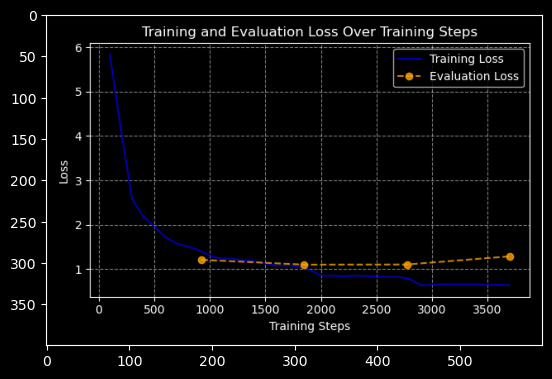

{'exact': 58.47275518035303, 'f1': 60.105971109584516, 'total': 13030, 'HasAns_exact': 21.90330007674597, 'HasAns_f1': 25.169731935208937, 'HasAns_total': 6515, 'NoAns_exact': 95.04221028396009, 'NoAns_f1': 95.04221028396009, 'NoAns_total': 6515}


In [58]:
model_name = "bert-base-uncased"
debug_mode = False
dataset_name = "squad2"

if reComputeResults or force_retrain:
    final_predictions = finetune_squadlike_qa(model_name=model_name, output_dir=output_dir, debug_mode=debug_mode, dataset_name=dataset_name, force_retrain=force_retrain, hyperparameters=hyperparameters)

img = plt.imread(os.path.join(output_dir, model_name,"training_evaluation_loss_plot.png"))
plt.imshow(img)
plt.show()

with open(os.path.join(output_dir, model_name, "evaluation_results.json"), "r") as f:
    evaluation_results = json.load(f)
print(evaluation_results)
#update the results dictionary with the new results
results['BERT']['finetuning_results'] = evaluation_results

#### Fine-tuning multilingual BERT on EuSQuAD

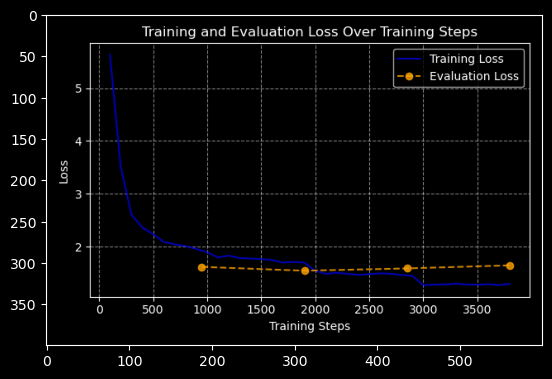

{'exact': 53.90636991557943, 'f1': 55.24757567343645, 'total': 13030, 'HasAns_exact': 8.963929393706831, 'HasAns_f1': 11.646340909420859, 'HasAns_total': 6515, 'NoAns_exact': 98.84881043745203, 'NoAns_f1': 98.84881043745203, 'NoAns_total': 6515}


In [59]:
model_name = "google-bert/bert-base-multilingual-uncased"
debug_mode = False
dataset_name = "eusquad"


if reComputeResults or force_retrain:
    final_predictions = finetune_squadlike_qa(model_name=model_name, output_dir=output_dir, debug_mode=debug_mode, dataset_name=dataset_name, force_retrain=force_retrain, hyperparameters=hyperparameters)

img = plt.imread(os.path.join(os.path.join(output_dir, model_name),"training_evaluation_loss_plot.png"))
plt.imshow(img)
plt.show()

with open(os.path.join(output_dir, model_name, "evaluation_results.json"), "r") as f:
    evaluation_results = json.load(f)
print(evaluation_results)
results['mBERT']['finetuning_results'] = evaluation_results


#### Fine-tuning ixamBERT on EuSQuAD

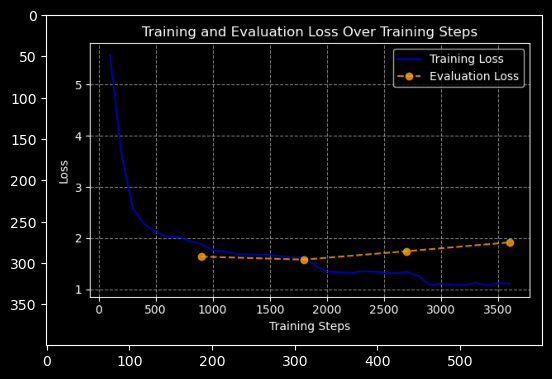

{'exact': 34.66615502686109, 'f1': 44.04706043892856, 'total': 13030, 'HasAns_exact': 41.933998465080585, 'HasAns_f1': 60.69580928921553, 'HasAns_total': 6515, 'NoAns_exact': 27.398311588641597, 'NoAns_f1': 27.398311588641597, 'NoAns_total': 6515}


In [60]:
model_name = "ixa-ehu/ixambert-base-cased"
debug_mode = False
dataset_name = "eusquad"

if reComputeResults or force_retrain:
    final_predictions = finetune_squadlike_qa(model_name=model_name, output_dir=output_dir, debug_mode=debug_mode, dataset_name=dataset_name, force_retrain=force_retrain, hyperparameters=hyperparameters)

img = plt.imread(os.path.join(os.path.join(output_dir, model_name),"training_evaluation_loss_plot.png"))
plt.imshow(img)
plt.show()

with open(os.path.join(output_dir, model_name, "evaluation_results.json"), "r") as f:
    evaluation_results = json.load(f)
print(evaluation_results)
results['ixamBERT']['finetuning_results'] = evaluation_results


#### Fine-Tuning BERTeus on EuSQuAD

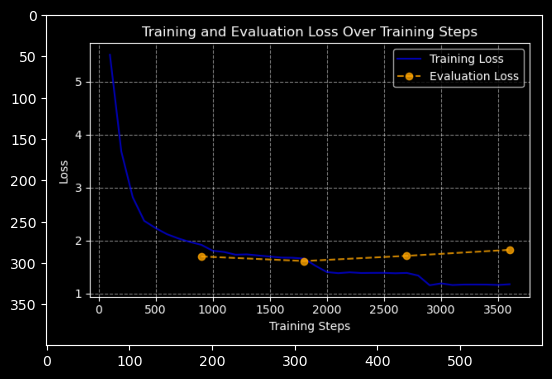

{'exact': 43.960092095165, 'f1': 51.787796119563744, 'total': 13030, 'HasAns_exact': 38.00460475825019, 'HasAns_f1': 53.66001280704767, 'HasAns_total': 6515, 'NoAns_exact': 49.91557943207982, 'NoAns_f1': 49.91557943207982, 'NoAns_total': 6515}


In [61]:
model_name = "ixa-ehu/berteus-base-cased"
debug_mode = False
dataset_name = "eusquad"

if reComputeResults or force_retrain:
    final_predictions = finetune_squadlike_qa(model_name=model_name, output_dir=output_dir, debug_mode=debug_mode, dataset_name=dataset_name, force_retrain=force_retrain, hyperparameters=hyperparameters)

img = plt.imread(os.path.join(os.path.join(output_dir, model_name),"training_evaluation_loss_plot.png"))
plt.imshow(img)
plt.show()

with open(os.path.join(output_dir, model_name, "evaluation_results.json"), "r") as f:
    evaluation_results = json.load(f)
print(evaluation_results)
results['BERTeus']['finetuning_results'] = evaluation_results


## Results

### Performance metrics after finetuning

#### BERT on the SQuAD2 dataset

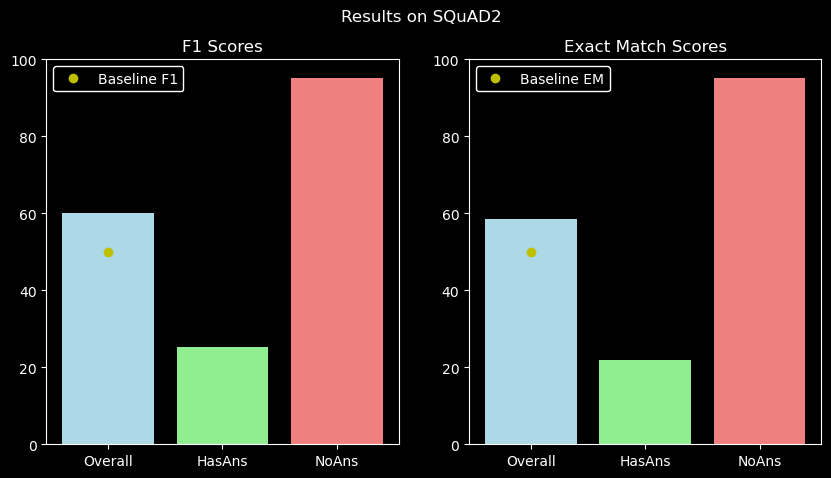

In [62]:
model = 'BERT'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Set background color to black
fig.patch.set_facecolor('black')
fig.suptitle('Results on SQuAD2', color='white')
for a in ax:
    a.set_facecolor('black')
    a.spines['bottom'].set_color('white')
    a.spines['top'].set_color('white')
    a.spines['right'].set_color('white')
    a.spines['left'].set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.yaxis.label.set_color('white')
    a.xaxis.label.set_color('white')
    a.title.set_color('white')

# Plot F1 scores
f1_scores = [
    results[model]['finetuning_results']['f1'],
    results[model]['finetuning_results']['HasAns_f1'],
    results[model]['finetuning_results']['NoAns_f1']
]
ax[0].bar(['Overall', 'HasAns', 'NoAns'], f1_scores, color=['lightblue', 'lightgreen', 'lightcoral'])
ax[0].plot(['Overall'], [results['baseline_F1']], 'yo', label='Baseline F1')
ax[0].set_ylim(0, 100)
ax[0].set_title('F1 Scores')
ax[0].legend(facecolor='black', edgecolor='white', framealpha=1, loc='upper left', labelcolor='white')

# Plot EM scores
em_scores = [
    results[model]['finetuning_results']['exact'],
    results[model]['finetuning_results']['HasAns_exact'],
    results[model]['finetuning_results']['NoAns_exact']
]
ax[1].bar(['Overall', 'HasAns', 'NoAns'], em_scores, color=['lightblue', 'lightgreen', 'lightcoral'])
ax[1].plot(['Overall'], [results['baseline_EM']], 'yo', label='Baseline EM')
ax[1].set_ylim(0, 100)
ax[1].set_title('Exact Match Scores')
ax[1].legend(facecolor='black', edgecolor='white', framealpha=1, loc='upper left', labelcolor='white')

plt.show()
fig.savefig('./figures/results_on_squad2.png', facecolor=fig.get_facecolor())


Turns out the model is learning something! The performance might not be SOTA, and does not come close to human performance (F1 89.452, EM 86.13), but it is better than a naive model that just predicts "unnanswerable" for every question (my artificial test set, which is a balanced answerable/non-answerable dataset extracted from the train set before training), which would score an F1 of 50 and an EM of 50, because it would get all the non-answerable questions right, but none of the answerable ones. This is promising, as it means the model is learning something, and it is not just memorizing the training set. (Bear in mind that the test performance reported here cannot be directly compared to that of the SQuAD2 leaderboard, as the test set is different, so this is just orientative). However, the performance on the answerable questions is not great. The model is struggling to find the exact answer, and it is often predicting a few words off. This is a common issue with QA models, and it is a challenging task to get right. But the model is catching most of the non-answerable questions, which is a good sign, perhaps because they are easier to predict.


Another interesting aspect we can look at is whether the model gets some specific type of questions right more often than others. For example, we can look at the performance of the model on questions that are about dates, or about people, or about locations. This can give us an idea of what the model is learning, and what it is not learning. For example, if the model is getting all the questions about dates right, but none of the questions about people, it might be that the model is just memorizing the dates, and not really understanding the questions.

We can evaluate the model's performance across different question types (e.g., "What," "When," "Who") by grouping questions based on their prefixes. For each question type, we can filter both the predictions and ground truth data, ensuring only relevant questions are evaluated. We compute F1 and Exact Match scores using the official evaluation script and adjust these scores to account for the number of questions in each group. By normalizing the scores, we ensure that results are comparable across types, regardless of the group size.

In [63]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def question_type_analysis(pred_file, truth_file, eval_script, question_types=("What", "When", "Who", "Why", "Where", "How")):
    """
    Analyze model performance based on question types.
    
    Parameters:
    - pred_file (str): Path to the predictions file (model output JSON).
    - truth_file (str): Path to the ground truth file (SQuAD format JSON).
    - eval_script (str): Path to the evaluate-v2.0.py script.
    - question_types (tuple): Question prefixes to group by (e.g., "What", "When", "Who").
    
    Output:
    - Bar plot of F1 and Exact Match scores for each question type.
    """
    # Load predictions and ground truth
    with open(pred_file, "r") as f:
        predictions = json.load(f)
    with open(truth_file, "r") as f:
        ground_truth = json.load(f)["data"]

    # Group questions by type
    grouped_questions = defaultdict(list)
    for article in ground_truth:
        for paragraph in article["paragraphs"]:
            for qa in paragraph["qas"]:
                question = qa["question"]
                qid = qa["id"]
                for qtype in question_types:
                    if question.lower().startswith(qtype.lower()):
                        grouped_questions[qtype].append(qid)
                        break

    # Evaluate for each question type
    f1_scores = []
    exact_scores = []
    for qtype, qids in grouped_questions.items():
        # Filter predictions and truth for the current question type
        filtered_predictions = {qid: predictions[qid] for qid in qids if qid in predictions}
        filtered_truth = {"data": [{"paragraphs": [{"qas": [qa for qa in paragraph["qas"] if qa["id"] in qids]}]} for article in ground_truth for paragraph in article["paragraphs"]]}
        
        # Write filtered files
        with open("filtered_predictions.json", "w") as f:
            json.dump(filtered_predictions, f)
        with open("filtered_truth.json", "w") as f:
            json.dump(filtered_truth, f)

        # Run the evaluation script
        import subprocess
        result = subprocess.run(
            ["python", eval_script, "filtered_truth.json", "filtered_predictions.json"],
            capture_output=True,
            text=True
        )
        eval_result = json.loads(result.stdout)

        # Collect scores
        f1_scores.append(eval_result["f1"])
        exact_scores.append(eval_result["exact"])

    # Visualization
    x_labels = list(grouped_questions.keys())
    x = range(len(x_labels))

    fig = plt.figure(figsize=(10, 5))
    fig.patch.set_facecolor('black')
    plt.style.use("dark_background")
    plt.bar(x, f1_scores, alpha=0.6, label="F1 Score", color="lightblue")
    plt.bar(x, exact_scores, alpha=0.6, label="Exact Match", color="lightgreen", width=0.4)
    plt.xticks(x, x_labels, rotation=45)
    plt.ylabel("Scores")
    plt.title("Model Performance by Question Type")
    plt.legend()
    plt.tight_layout()
    plt.show()


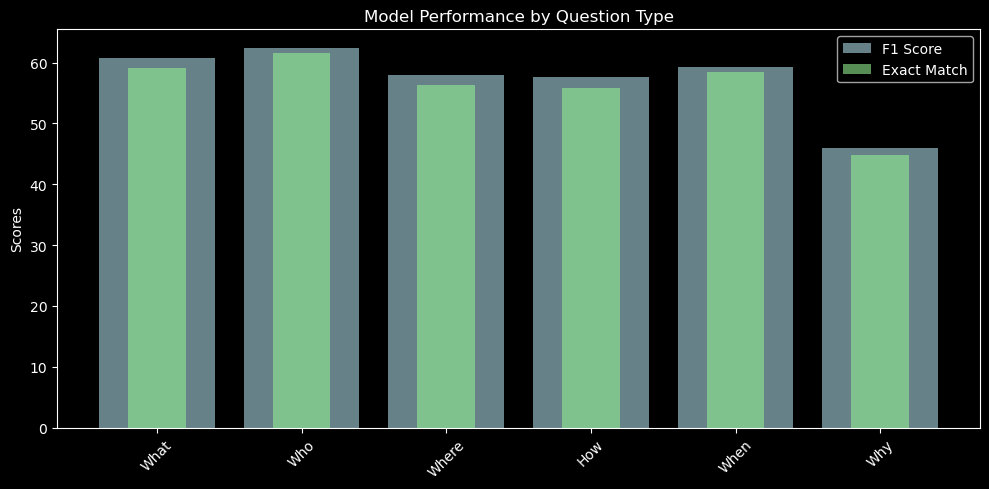

In [64]:
question_type_analysis(
    pred_file="./squad2.0/test_predictions.json",
    truth_file="./squad2.0/test_data.json",
    eval_script="evaluate-v2.0.py",
    question_types=("What", "When", "Who", "Why", "Where", "How"))


The model seems to struggle the most with questions that start with "Why" which may make sense because these questions can be more abstract than "Who" or "When". The model might not have enough context to answer these questions accurately, or may be unable to reason the Why answers.

#### Different models on the EuSQuAD dataset

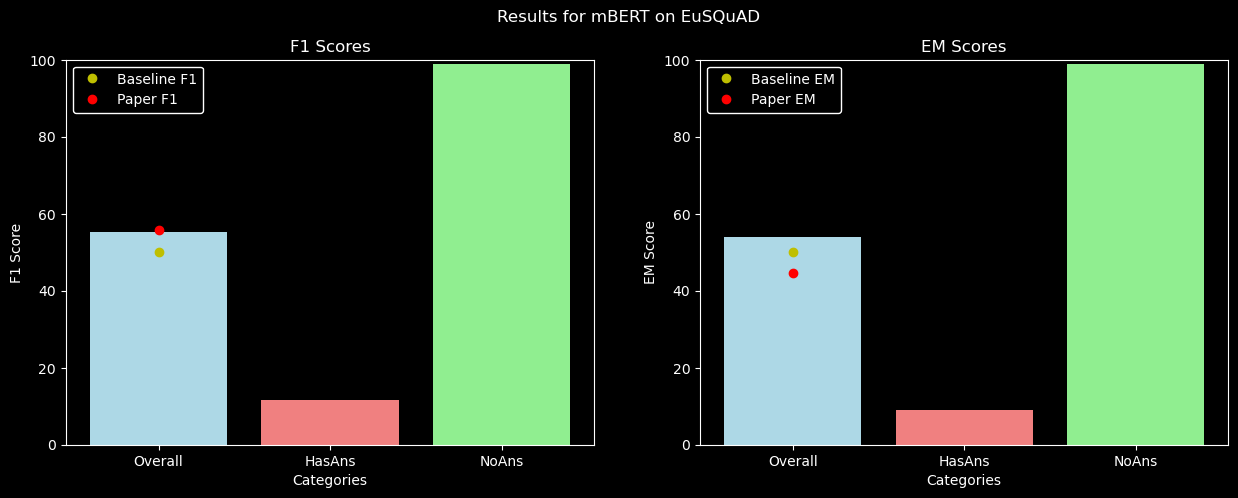

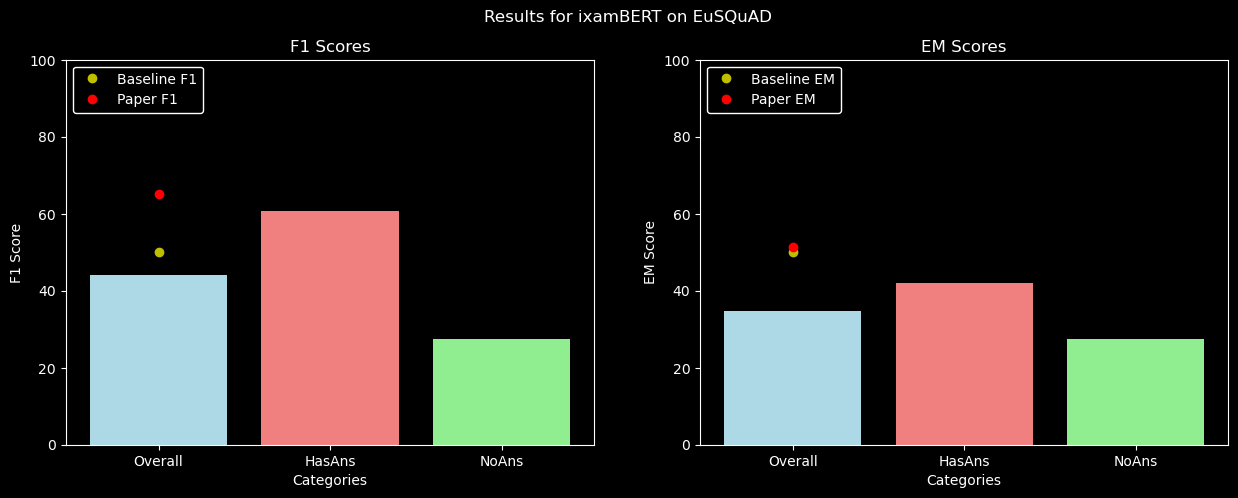

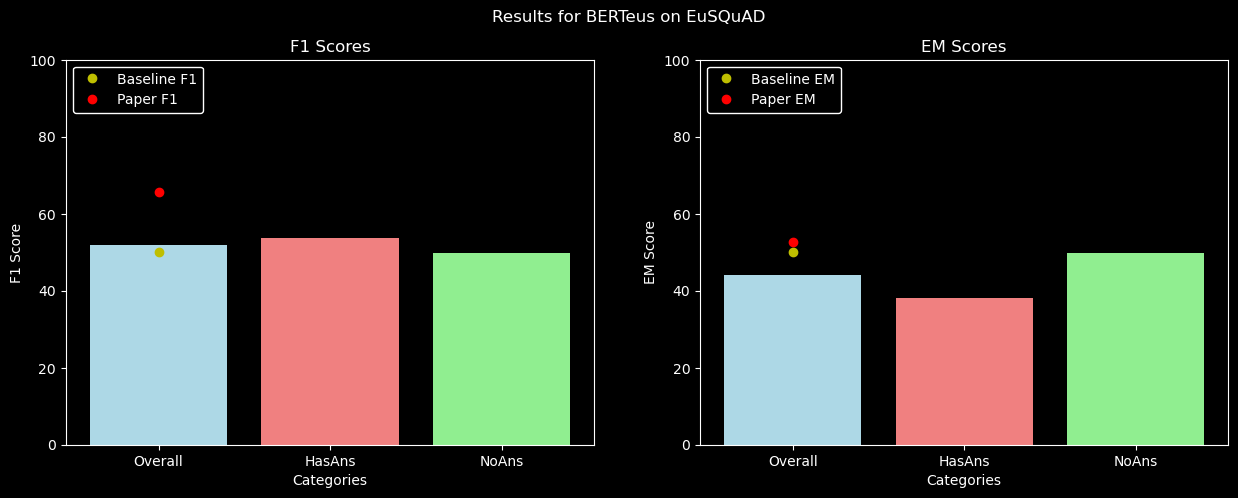

In [65]:
models = ['mBERT', 'ixamBERT', 'BERTeus']

for model in models:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Results for {model} on EuSQuAD', color='white')
    fig.patch.set_facecolor('black')
    
    for a in ax:
        a.set_facecolor('black')
        a.spines['bottom'].set_color('white')
        a.spines['top'].set_color('white')
        a.spines['right'].set_color('white')
        a.spines['left'].set_color('white')
        a.tick_params(axis='x', colors='white')
        a.tick_params(axis='y', colors='white')
        a.yaxis.label.set_color('white')
        a.xaxis.label.set_color('white')
        a.title.set_color('white')
        a.set_ylim(0, 100)  # Set y-axis limits to 0-100

    # Plot F1 scores
    f1_scores = [
        results[model]['finetuning_results']['f1'],
        results[model]['finetuning_results']['HasAns_f1'],
        results[model]['finetuning_results']['NoAns_f1']
    ]
    ax[0].bar(['Overall', 'HasAns', 'NoAns'], f1_scores, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax[0].plot(['Overall'], [results['baseline_F1']], 'yo', label='Baseline F1')
    ax[0].plot(['Overall'], [results[model]['paper_F1']], 'ro', label='Paper F1')
    ax[0].set_xlabel('Categories')
    ax[0].set_ylabel('F1 Score')
    ax[0].set_title('F1 Scores')
    ax[0].legend(facecolor='black', edgecolor='white', framealpha=1, loc='upper left', labelcolor='white')

    # Plot EM scores
    em_scores = [
        results[model]['finetuning_results']['exact'],
        results[model]['finetuning_results']['HasAns_exact'],
        results[model]['finetuning_results']['NoAns_exact']
    ]
    ax[1].bar(['Overall', 'HasAns', 'NoAns'], em_scores, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax[1].plot(['Overall'], [results['baseline_EM']], 'yo', label='Baseline EM')
    ax[1].plot(['Overall'], [results[model]['paper_EM']], 'ro', label='Paper EM')
    ax[1].set_xlabel('Categories')
    ax[1].set_ylabel('EM Score')
    ax[1].set_title('EM Scores')
    ax[1].legend(facecolor='black', edgecolor='white', framealpha=1, loc='upper left', labelcolor='white')

    plt.show()
    fig.savefig(f'./figures/results_for_{model.lower()}_on_eusquad.png', facecolor=fig.get_facecolor())

We have some interesting findings here. If we just looked at the overall F1 and EM metrics, we could argue that the best performing model on the Basque task is the general mBERT model, which is surprising. We would expect the more specialized models to perform better, indeed, if we then look at the specific answerable/unanswerable questions, we learn that mBERT is doing very well at identifying the unanswerable questions, (or, at least, is predicting unanswerable most of the times), which raises overall EM and F1 scores, but the performance on the answerable questions is terrible. When we look at the specialized models, we see that they are doing much better at answering the identifying answerable questions, but they are struggling with the unanswerable ones. This is an interesting result, and it shows that the choice of model can have a big impact on performance, depending on the task. BERTeus, which is fully pre-trained on Basque corpora, gives the most balanced performance on both answerable and unanswerable questions, which is promising, and may suggest that the other models, pre-trained on multilingual corpora, are not capturing the specific linguistic patterns of Basque as well as the specialized model. 
When comparing the obtained results to those reported on the EuSQuAD paper, we find that we do not reach the same performance levels. This could be due to several factors, such as the different test sets used, the fine-tuning process, or the specific hyperparameters chosen. However, most likely, in their test set, they only have answerable questions, and their difficulty might be different to that of the original SQuAD dataset, which could explain the discrepancy in performance, I also had to leave out some of the training data to create the test set, which could have affected the model's performance.

## Understanding how the fine-tuned models work towards predicting the answer

Due to the architectural complexity of NLP models, it can be useful to visualize the different aspects that come into play when predicting answers. In this section, I will cover some of the aspects by implementing different visualization techniques, which hopefully should make it easier to understand how the models are working.

### Visualizing the attention layers

The BERTViz interface provides an intuitive way to explore how the transformer architecture processes input. In a transformer, tokens like "Beyoncé" use self-attention to focus on other tokens in the sequence, determining which are most relevant to understanding the context. Each layer of the model refines this understanding, and within each layer, multiple attention heads focus on different relationships or patterns. The colored boxes in BERTViz represent these attention heads, while the connections between the left (input tokens) and right (attended tokens) panels show how strongly one token attends to others. Early layers focus on surface-level information, while deeper layers capture more complex meaning, making this visualization a powerful tool for understanding how transformers process language.

In [66]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from bertviz import head_view

def visualize_question_attention(model_name, dataset_name, example_index):
    """
    Visualizes attention for the question tokens only using BERTViz.
    
    Parameters:
    - model_name (str): Path to the model or model name from Hugging Face hub.
    - dataset_name (str): Dataset to use (e.g., "squad" or "squad_v2").
    - example_index (int): Index of the example in the dataset to visualize.
    """
    # Load the dataset
    if dataset_name == "squad_v2":
        dataset = load_dataset(dataset_name, split=f"train[{example_index}:{example_index + 1}]")
    elif dataset_name == "eusquad":
        dataset = load_dataset('json', data_files='eusquad_v1.0/eusquad-train-v1.0_canine-s.jsonl', split=f"train[{example_index}:{example_index + 1}]" )

    
    first_sample = dataset[0]
    question = first_sample["question"]
    context = first_sample["context"]

    # Load the model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForQuestionAnswering.from_pretrained(model_name, output_attentions=True)

    # Encode inputs
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", truncation=True, max_length=384)
    input_ids = inputs["input_ids"]

    # Get model outputs
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention scores (one tensor per layer)

    # Convert input IDs to tokens
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    # Identify question tokens
    cls_index = tokens.index("[CLS]")
    sep_index = tokens.index("[SEP]")
    question_tokens = tokens[cls_index + 1:sep_index]

    # Extract attention scores for question tokens
    filtered_attentions = []
    for layer_attention in attentions:
        filtered_layer_attention = layer_attention[:, :, cls_index + 1:sep_index, cls_index + 1:sep_index]
        filtered_attentions.append(filtered_layer_attention)

    # Visualize with BERTViz
    print("Visualizing Question Tokens with BERTViz...")
    head_view(filtered_attentions, question_tokens)

In [67]:
visualize_question_attention("results/bert-base-uncased/best_model", "squad_v2", 0)
visualize_question_attention("results/ixa-ehu/berteus-base-cased/best_model", "eusquad", 0)

Visualizing Question Tokens with BERTViz...


<IPython.core.display.Javascript object>

Visualizing Question Tokens with BERTViz...


<IPython.core.display.Javascript object>

### Visualizing how the models predict the answer from probabilities on the provided context

The model predicts the answer span by generating two logits for each token in the input sequence: one for the probability of being the start of the answer and one for the end. These logits, which are raw scores, are passed through a softmax function to convert them into probabilities, ensuring that they sum to 1. The token with the highest start probability marks the beginning of the predicted answer, while the token with the highest end probability marks its end. By combining the start and end probabilities for each token, we visualize their relevance using color intensity. This highlights how the model identifies the most likely span in the context that answers the question, based on its understanding of the relationship between the question and the context.

In [68]:
from IPython.display import display, HTML
import numpy as np
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from datasets import load_dataset

def visualize_qa_attention_with_question_highlight(model_name, dataset_name, example_index):
    """
    Visualizes the tokens in the question (between [CLS] and the first [SEP]) in dark blue 
    and highlights context tokens based on their probabilities.
    """
    # Load the dataset
    if dataset_name == "squad_v2":
        dataset = load_dataset(dataset_name, split=f"train[{example_index}:{example_index + 1}]")
    elif dataset_name == "eusquad":
        dataset = load_dataset('json', data_files='eusquad_v1.0/eusquad-train-v1.0_canine-s.jsonl', split=f"train[{example_index}:{example_index + 1}]" )

    # Extract the specific question-context pair
    first_sample = dataset[0]
    question = first_sample["question"]
    context = first_sample["context"]

    # Load the model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForQuestionAnswering.from_pretrained(model_name)

    # Encode the input
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", truncation=True, max_length=384)

    # Get model outputs
    outputs = model(**inputs)
    start_logits = outputs.start_logits[0].detach().numpy()
    end_logits = outputs.end_logits[0].detach().numpy()

    # Compute word probabilities
    input_ids = inputs["input_ids"][0].detach().numpy()
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    start_probs = np.exp(start_logits) / np.sum(np.exp(start_logits))
    end_probs = np.exp(end_logits) / np.sum(np.exp(end_logits))

    # Combine start and end probabilities for token highlighting
    token_probs = (start_probs + end_probs) / 2

    # Function to display tokens with highlights
    def display_highlighted_tokens(tokens, token_probs):
        highlighted_text = ""

        # Extract indices for special tokens
        cls_index = tokens.index("[CLS]")
        sep_index = tokens.index("[SEP]")

        for i, token in enumerate(tokens):
            if cls_index < i < sep_index:
                # Highlight tokens in the question in dark blue
                color = "rgba(0, 0, 139, 0.8)"  # Dark blue
                highlighted_text += f'<span style="background-color: {color}; padding: 2px; margin: 1px; border-radius: 3px;">{token}</span> '
            else:
                # Highlight other tokens (e.g., context) in red proportional to probability
                prob = token_probs[i]
                color = f"rgba(255, 0, 0, {prob:.2f})"  # Red highlight with alpha based on probability
                highlighted_text += f'<span style="background-color: {color}; padding: 2px; margin: 1px; border-radius: 3px;">{token}</span> '
        
        # Display as HTML
        display(HTML(f"<div style='font-family:monospace;'>{highlighted_text}</div>"))

    # Display the tokens with highlights
    display_highlighted_tokens(tokens, token_probs)


In [69]:
visualize_qa_attention_with_question_highlight("results/bert-base-uncased/best_model", "squad_v2", 0)
visualize_qa_attention_with_question_highlight("results/ixa-ehu/berteus-base-cased/best_model", "eusquad", 0)

### Visualizing how the model gives more importance to tokens that are relevant to the question-answer

This visualization highlights the importance of each token by calculating the gradient of the model's output (start and end logits) with respect to the input embeddings. These embeddings represent the numerical meaning of each token, and the gradients show how sensitive the model's predictions are to changes in these values. By averaging the absolute gradient values across dimensions, we can measure each token's overall contribution to the predicted answer. The importance scores are normalized and visualized with red highlights, where brighter intensity reflects greater significance. This approach helps reveal which tokens in the question and context the model focuses on most when determining the answer.

In [70]:
import torch
import numpy as np
from IPython.display import display, HTML
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

def visualize_token_importance(model_name, dataset_name, example_index):
    """
    Visualizes the importance of each token in the context and question based on gradient saliency.
    """
    # Load the dataset
    if dataset_name == "squad_v2":
        dataset = load_dataset(dataset_name, split=f"train[{example_index}:{example_index + 1}]")
    elif dataset_name == "eusquad":
        dataset = load_dataset('json', data_files='eusquad_v1.0/eusquad-train-v1.0_canine-s.jsonl', split=f"train[{example_index}:{example_index + 1}]" )
        
    first_sample = dataset[0]
    question = first_sample["question"]
    context = first_sample["context"]

    # Load the model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForQuestionAnswering.from_pretrained(model_name)

    # Encode the input
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", truncation=True, max_length=384)

    # Create embeddings as a leaf variable with requires_grad=True
    input_ids = inputs["input_ids"]
    input_embeddings = model.get_input_embeddings()(input_ids)
    input_embeddings = input_embeddings.clone().detach().requires_grad_(True)

    # Forward pass to get logits
    outputs = model(inputs_embeds=input_embeddings, attention_mask=inputs["attention_mask"])
    start_logits = outputs.start_logits[0]
    end_logits = outputs.end_logits[0]

    # Backpropagate gradients for start and end logits
    start_logits.max().backward(retain_graph=True)
    end_logits.max().backward()

    # Compute gradient-based saliency
    gradients = input_embeddings.grad.detach().abs().mean(dim=-1).squeeze().numpy()
    token_importance = gradients / gradients.max()  # Normalize importance scores

    # Convert tokens back to readable format
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0].numpy())

    # Visualize tokens with importance
    def display_tokens_with_importance(tokens, token_importance):
        highlighted_text = ""
        for token, importance in zip(tokens, token_importance):
            color = f"rgba(255, 0, 0, {importance:.2f})"  # Red intensity based on importance
            highlighted_text += f'<span style="background-color: {color}; padding: 2px; margin: 1px; border-radius: 3px;">{token}</span> '
        display(HTML(f"<div style='font-family:monospace;'>{highlighted_text}</div>"))

    display_tokens_with_importance(tokens, token_importance)


In [71]:
visualize_token_importance("results/bert-base-uncased/best_model", "squad_v2", 252)
visualize_token_importance("results/ixa-ehu/berteus-base-cased/best_model", "eusquad", 252)

In this specific case, we can see how "where" in the question makes the "hospital" in the context more relevant, leading to a higher importance score for that token, but also "resort" gets some attention. This is very likely due to the fact that the model learns to associate the "where" question with location names. This is the same "non" and "ospital" in the Basque version, which are the direct translations of "where" and "hospital".

Another interesting observation is that the model gives more importance to the words that are present both in the question and in the context, which is probably a rational thing to do, see, for example, "birth", "child", and probably "daughter", because it is semantically related to "child". These are equivalent to "erdi", and "seme" in the Basque version, which are the direct translations.

## Conclusions



In this study, I explored various approaches to adapting state-of-the-art question-answering models for the Basque language, and comparing them to English-based approaches. Starting with general-purpose models like BERT and progressively incorporating multilingual and Basque-specific architectures such as mBERT, ixamBERT, and BERTeus. By fine-tuning these models on the SQuAD and EuSQuAD datasets, I was able to highlight the potential advantages of leveraging language-specific pre-trained models, especially for low-resource languages like Basque. Most importantly, and even though the results are not even nearly close to human performance or SOTA on the task, the models are learning something, and they are not just memorizing the training set, which is promising. I also found that not just reporting overall EM and F1 metrics, but also looking at the performance on specific types of questions, can give us a better understanding of what the model is learning, and what it is not learning, as well as the ability of the models to identify answerable and unanswerable questions. This is particularly relevant for QA tasks, where the model's ability to reason and understand context is crucial.

However, the findings also highlight the common challenges associated with training models for minority languages. Some possible explanations for the performance gap between English and Basque models include the lack of equal large-scale pre-training data, the unique linguistic characteristics of Basque, and the (perhaps) noisier nature of the training dataset. These factors can hinder the model's ability to generalize well to unseen data and may require more extensive fine-tuning or specialized architectures to achieve competitive performance.

Perhaps the most interesting aspect was visualizing how the models process the input data, focusing on attention layers, answer prediction probabilities, and token importance scores. These visualizations provide valuable insights into how the models understand and reason over text, making the decision-making processes of the model visible and highlighting areas for improvement.


## Limitations and Future Work

As with any study, there were limitations. The unavailability of public test sets for both SQuAD and EuSQuAD posed a significant challenge. To address this, I held out 10% of the training data to create a custom test set, but this approach is not without flaws. Although I ensured that the test set consisted of unique question-answer pairs, some of the contexts overlapped with the training and validation sets. This overlap could introduce biases, where the model might rely on context-specific cues, potentially inflating its performance. A dedicated, hand-crafted test set would have provided a more definitive evaluation and should be prioritized in future work.

Another limitation was the reliance on hyperparameters adapted from previous EuSQuAD research. While these settings provided a solid starting point, they may not have been fully optimized for the specifics of the Basque language or the computational constraints of my setup. Exploring more tailored hyperparameter tuning could lead to further performance gains.

Additionally, the pre-trained Basque-specific models like BERTeus and ixamBERT, while showing promise, were trained on limited Basque-language corpora. Expanding these datasets with more diverse and representative content could improve the pre-training phase and, in turn, the downstream QA performance.

Finally, the creation of the test set through pseudorandom sampling ensured a balanced distribution of answerable and unanswerable questions but might not reflect real-world data distributions. A more natural distribution in future datasets could help provide a better understanding of how these models would perform in practical applications.

## One last word


In [72]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

def ask_question(context, question, model_name="results/bert-base-uncased/best_model"):
    """
    Uses a fine-tuned QA model to answer questions based on a given context.

    Args:
    - context (str): The text context to find the answer.
    - question (str): The question to ask about the context.
    - model_name (str): Path to the fine-tuned QA model.

    Returns:
    - str: The answer predicted by the model.
    """
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForQuestionAnswering.from_pretrained(model_name)

    # Tokenize the inputs
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", truncation=True, max_length=512)

    # Get the model's predictions
    outputs = model(**inputs)
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # Get the most probable start and end tokens
    start_idx = torch.argmax(start_logits)
    end_idx = torch.argmax(end_logits) + 1

    # Decode the tokens to get the answer
    input_ids = inputs["input_ids"][0]
    answer_tokens = input_ids[start_idx:end_idx]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

    # Return the predicted answer
    return answer


In [73]:
context = """
Most importantly, the main objective of this work is to raise awareness of the importance of supporting and advancing NLP research in minority languages. By showcasing the potential of adapting large language models to underrepresented languages like Basque, I hope to encourage further exploration and investment in this area. Future work could focus on improving the quality and size of training data, developing more sophisticated models tailored to the linguistic properties of Basque, or using tools to expand and educate the Basque-speaking ML community about the workarounds of NLP architectures, and how these models learn language concepts.
"""
model_name = "results/bert-base-uncased/best_model"

print("Context:", context)

question = "What is the main aim of this work?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))

question = "What would I like to encourage?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))

question = "What can we teach the Basque-speaking ML community?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))

question = "What could future work focus on?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))


Context: 
Most importantly, the main objective of this work is to raise awareness of the importance of supporting and advancing NLP research in minority languages. By showcasing the potential of adapting large language models to underrepresented languages like Basque, I hope to encourage further exploration and investment in this area. Future work could focus on improving the quality and size of training data, developing more sophisticated models tailored to the linguistic properties of Basque, or using tools to expand and educate the Basque-speaking ML community about the workarounds of NLP architectures, and how these models learn language concepts.


Question: What is the main aim of this work?
Predicted Answer: to raise awareness of the importance of supporting and advancing nlp research in minority languages

Question: What would I like to encourage?
Predicted Answer: further exploration and investment

Question: What can we teach the Basque-speaking ML community?
Predicted Answer

And of course... in Basque...

In [74]:
context = """Lan honen helburu nagusia NLPren ikerketa hizkuntza gutxituetan babestu eta aurrera egitearen garrantziaz sentsibilizatzea da. Hizkuntza-eredu handiak ordezkaritza txikia duten hizkuntzetara (euskarara, esaterako) egokitzeko ahalmena erakutsiz, esparru horretan esplorazio eta inbertsio gehiago sustatzea espero dut. Etorkizuneko lana izan liteke entrenamendu datuen kalitatea eta tamaina hobetzea, euskararen hizkuntza-ezaugarrietara egokitutako eredu sofistikatuagoak garatzea, edo euskera-hiztunen artean ML komunitatea zabaltzea, horretarako NLP arkitekturen inguruan ezaguera zabalduz. """

print("Context:", context)
model_name = 'results/ixa-ehu/berteus-base-cased/best_model'


question = "Zein izan da lan honen helburua?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))

question = "Nola zabaldu daiteke euskera-hiztunen artean ML komunitatea?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))

question = "Zer hobekuntzak egin daitezke etorkizunean?"
print("\nQuestion:", question)
print("Predicted Answer:", ask_question(context, question, model_name))


Context: Lan honen helburu nagusia NLPren ikerketa hizkuntza gutxituetan babestu eta aurrera egitearen garrantziaz sentsibilizatzea da. Hizkuntza-eredu handiak ordezkaritza txikia duten hizkuntzetara (euskarara, esaterako) egokitzeko ahalmena erakutsiz, esparru horretan esplorazio eta inbertsio gehiago sustatzea espero dut. Etorkizuneko lana izan liteke entrenamendu datuen kalitatea eta tamaina hobetzea, euskararen hizkuntza-ezaugarrietara egokitutako eredu sofistikatuagoak garatzea, edo euskera-hiztunen artean ML komunitatea zabaltzea, horretarako NLP arkitekturen inguruan ezaguera zabalduz. 

Question: Zein izan da lan honen helburua?
Predicted Answer: ikerketa hizkuntza gutxituetan babestu eta aurrera egitearen garrantziaz sentsibilizatzea

Question: Nola zabaldu daiteke euskera-hiztunen artean ML komunitatea?
Predicted Answer: NLP arkitekturen inguruan ezaguera zabalduz

Question: Zer hobekuntzak egin daitezke etorkizunean?
Predicted Answer: entrenamendu datuen kalitatea eta tamain